CHARTS AND GRAPHS OF THE DATASET


In [4]:
!pip install pyspark seaborn matplotlib


In [5]:
from pyspark.sql import SparkSession
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
spark = SparkSession.builder.appName("TaxiTripAnalysis").getOrCreate()


In [7]:
df = spark.read.csv("taxi_trip_data.csv", header=True, inferSchema=True)


In [8]:
df.printSchema()
df.select("passenger_count").show(5)


root
 |-- vendor_id: integer (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- rate_code: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- imp_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- pickup_location_id: integer (nullable = true)
 |-- dropoff_location_id: integer (nullable = true)

+---------------+
|passenger_count|
+---------------+
|              1|
|              1|
|              1|
|              2|
|              5|
+---------------+
only showing top 5 rows



In [9]:
from pyspark.sql.functions import col

df = df.withColumn("passenger_count", col("passenger_count").cast("int"))


In [10]:
grouped_df = df.groupBy("passenger_count").count().orderBy("passenger_count")
grouped_pd = grouped_df.toPandas()


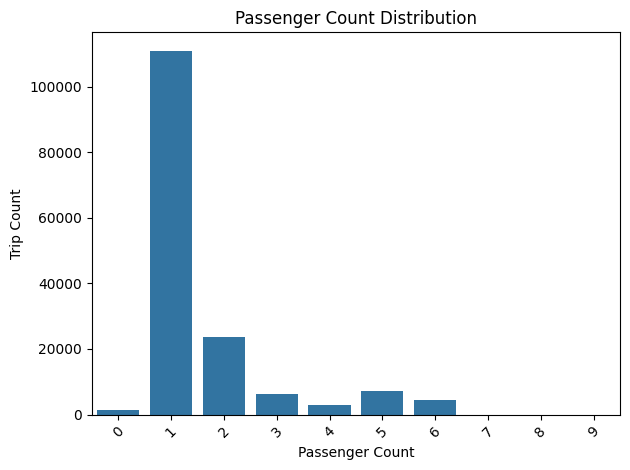

In [11]:
sns.barplot(x="passenger_count", y="count", data=grouped_pd)
plt.title("Passenger Count Distribution")
plt.xlabel("Passenger Count")
plt.ylabel("Trip Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


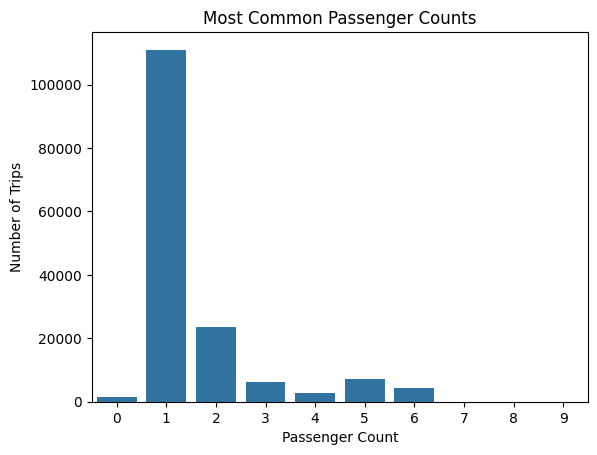

In [12]:
# Insight 1: Most common passenger counts

from pyspark.sql.functions import col
passenger_counts = df.groupBy("passenger_count").count().orderBy("passenger_count")
passenger_counts_pd = passenger_counts.toPandas()

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="passenger_count", y="count", data=passenger_counts_pd)
plt.title("Most Common Passenger Counts")
plt.xlabel("Passenger Count")
plt.ylabel("Number of Trips")
plt.show()


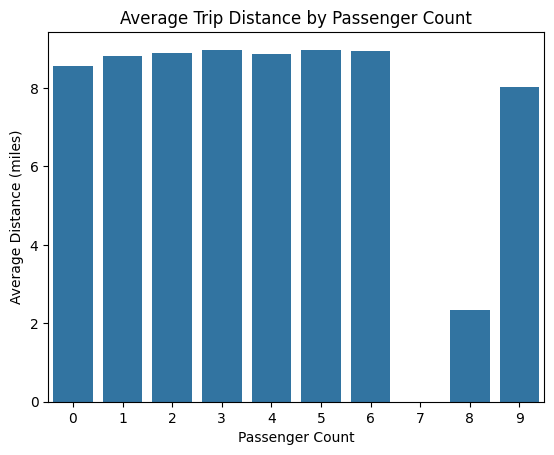

In [13]:
# Insight 2: Average trip distance by passenger count

avg_distance = df.groupBy("passenger_count").avg("trip_distance").orderBy("passenger_count")
avg_distance_pd = avg_distance.toPandas()

sns.barplot(x="passenger_count", y="avg(trip_distance)", data=avg_distance_pd)
plt.title("Average Trip Distance by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Average Distance (miles)")
plt.show()


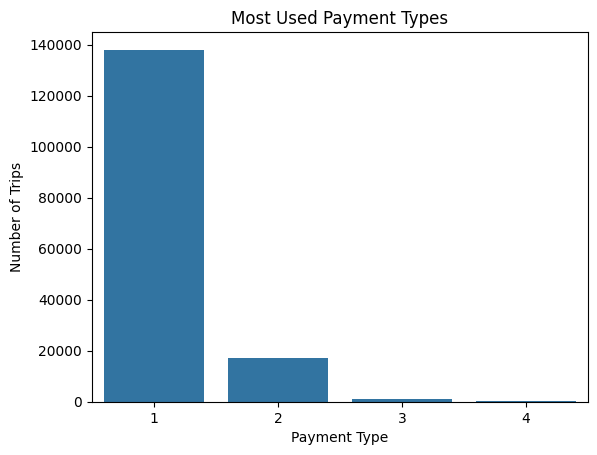

In [14]:
# Insight 3: Most used payment types

payment_counts = df.groupBy("payment_type").count().orderBy("count", ascending=False)
payment_counts_pd = payment_counts.toPandas()

sns.barplot(x="payment_type", y="count", data=payment_counts_pd)
plt.title("Most Used Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.show()


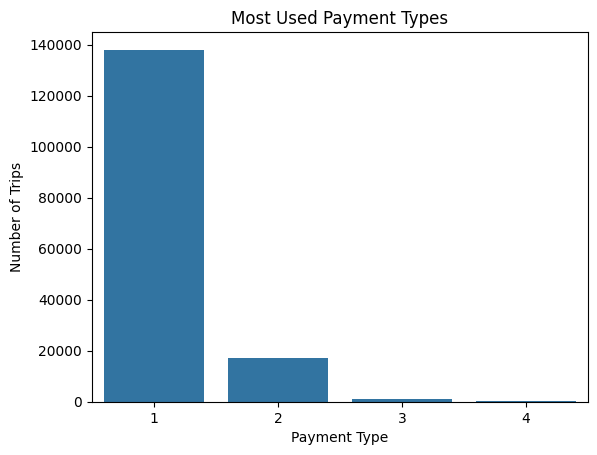

In [15]:
# Insight 3: Most used payment types

payment_counts = df.groupBy("payment_type").count().orderBy("count", ascending=False)
payment_counts_pd = payment_counts.toPandas()

sns.barplot(x="payment_type", y="count", data=payment_counts_pd)
plt.title("Most Used Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.show()


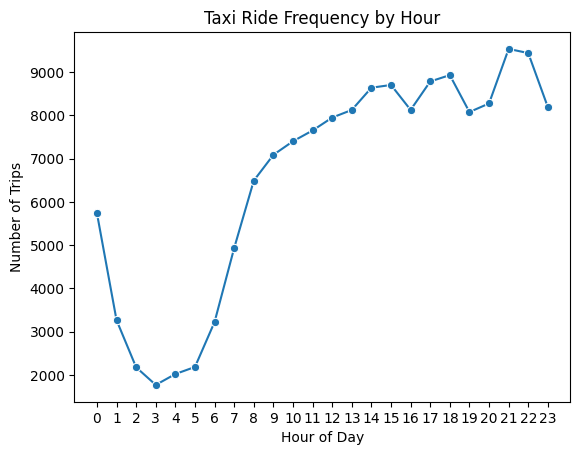

In [16]:
# Insight 5: Taxi ride frequency by pickup hour

from pyspark.sql.functions import hour

df = df.withColumn("pickup_hour", hour(col("pickup_datetime")))
hourly_counts = df.groupBy("pickup_hour").count().orderBy("pickup_hour")
hourly_counts_pd = hourly_counts.toPandas()

sns.lineplot(x="pickup_hour", y="count", data=hourly_counts_pd, marker="o")
plt.title("Taxi Ride Frequency by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.show()


<ipython-input-17-fc44790e24eb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="passenger_count", y="count", data=passenger_counts_pd, palette="Blues_d")


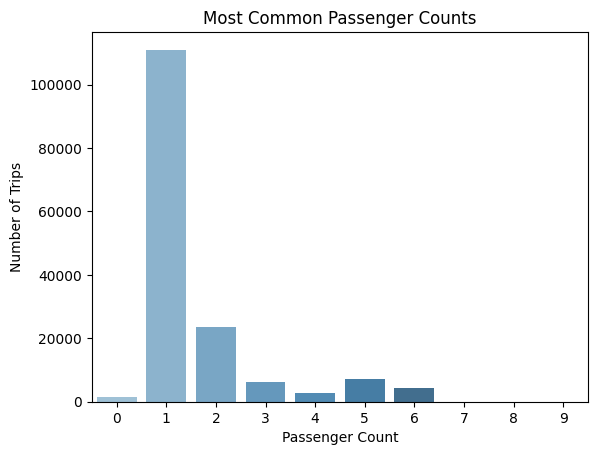

In [17]:
#  Insight 6 Bar Plot for Passenger Count Distribution

passenger_counts = df.groupBy("passenger_count").count().orderBy("passenger_count")
passenger_counts_pd = passenger_counts.toPandas()

sns.barplot(x="passenger_count", y="count", data=passenger_counts_pd, palette="Blues_d")
plt.title("Most Common Passenger Counts")
plt.xlabel("Passenger Count")
plt.ylabel("Number of Trips")
plt.show()


<ipython-input-18-610ca1f97f21>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="passenger_count", y="trip_distance", data=box_pd, palette="Set2")


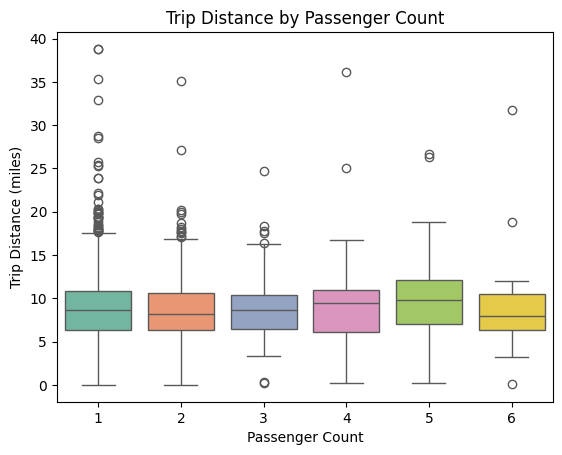

In [18]:
# Insight 7: Trip Distance Distribution (Box Plot)

box_df = df.select("passenger_count", "trip_distance") \
    .filter((col("passenger_count") > 0) & (col("trip_distance") > 0)) \
    .sample(False, 0.01)

box_pd = box_df.toPandas()

sns.boxplot(x="passenger_count", y="trip_distance", data=box_pd, palette="Set2")
plt.title("Trip Distance by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Trip Distance (miles)")
plt.show()


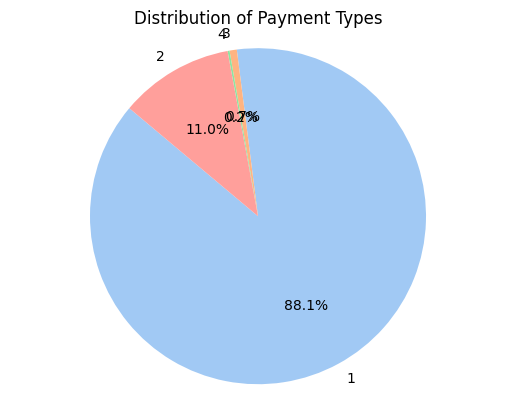

In [19]:
# Insight 8: Payment Type Distribution (Pie Chart)

payment_counts = df.groupBy("payment_type").count()
payment_pd = payment_counts.toPandas()

plt.pie(payment_pd["count"], labels=payment_pd["payment_type"],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribution of Payment Types")
plt.axis("equal")
plt.show()



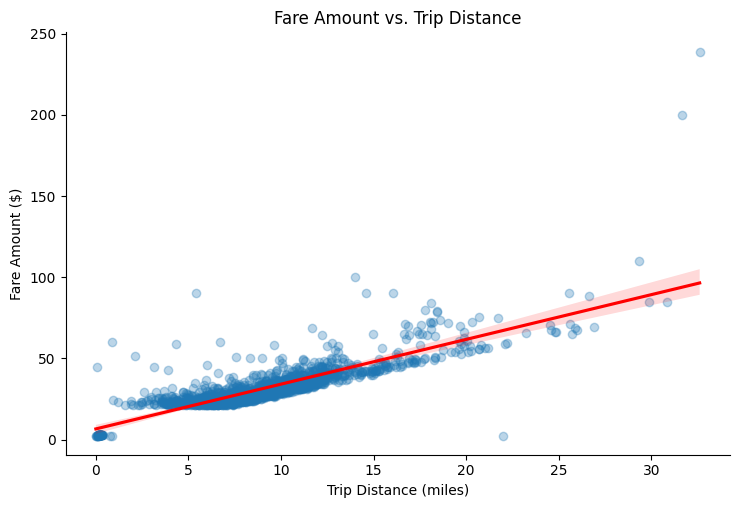

In [20]:
# Insight 9: Fare vs Distance (Scatter Plot with Regression Line)

fare_sample = df.select("trip_distance", "fare_amount") \
    .filter((col("trip_distance") > 0) & (col("fare_amount") > 0)) \
    .sample(False, 0.01)

fare_pd = fare_sample.toPandas()

sns.lmplot(x="trip_distance", y="fare_amount", data=fare_pd,
           scatter_kws={'alpha':0.3}, line_kws={"color": "red"}, height=5, aspect=1.5)
plt.title("Fare Amount vs. Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()


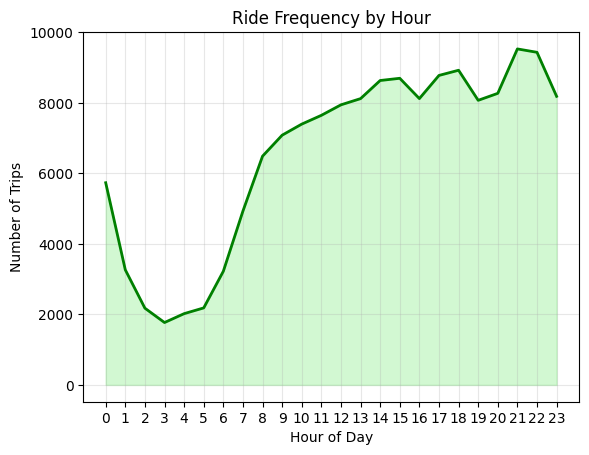

In [21]:
# Insight 10: Ride Frequency by Hour (Area Plot)

from pyspark.sql.functions import hour
df = df.withColumn("pickup_hour", hour(col("pickup_datetime")))

hourly_counts = df.groupBy("pickup_hour").count().orderBy("pickup_hour")
hourly_pd = hourly_counts.toPandas()

plt.fill_between(hourly_pd["pickup_hour"], hourly_pd["count"], color='lightgreen', alpha=0.4)
plt.plot(hourly_pd["pickup_hour"], hourly_pd["count"], color='green', linewidth=2)
plt.title("Ride Frequency by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.show()
